In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
def plot_raw_matrix(corr_mat):
    #fig, ax = plt.figure(figsize=(10,5))
    ms = plt.matshow(corr_mat, interpolation="nearest",
               vmax=1, vmin=-1, cmap='RdBu_r')
    plt.colorbar(ms)

In [4]:
def plot_thresh_matrix(corr_mat):
    #fig, ax = plt.figure(figsize=(10,5))
    ms = plt.matshow(corr_mat, interpolation="nearest",
               vmax=1, vmin=0, cmap='viridis')
    plt.colorbar(ms)

In [5]:
sns.set(context='notebook')
sns.set(style='white')

### Control mice

Load the correlation of cFos co-activations across control animals.

In [29]:
control_df = pd.read_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_control_orig_20180316.csv')

Drop the column of brain area labels.


In [30]:
control_data = control_df.iloc[0:, 1:]

Save a new version of the raw correlation values without row or column labels.

In [31]:
control_data.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_control_raw_mat_20180317.csv', index=None, header=None)

Get the correlatoin values as an array.


In [10]:
control_data_array = control_data.values

Zero-out self correlations.

In [11]:
np.fill_diagonal(control_data_array, 0)

Plot the raw correlation matrix.

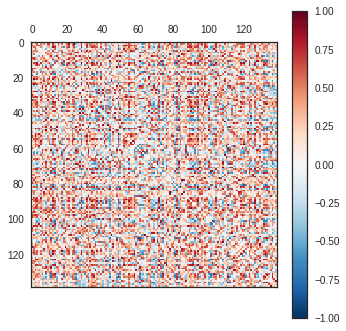

In [12]:
plot_raw_matrix(control_data_array)

Plot the distribution of correlation coefficients.

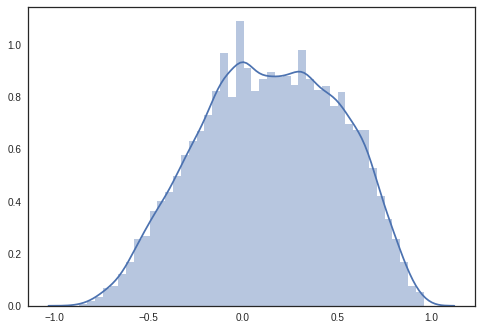

In [13]:
sns.distplot(control_data_array.ravel())

Threshold the correlation matrix with a connection density of 5%.

In [14]:
ctrl_95pctl = stats.scoreatpercentile(control_data_array, 95)

In [18]:
control_95pctl_mask = (control_data_array <= ctrl_95pctl)

In [19]:
control_data_array[control_95pctl_mask] = 0

We are left with this many edges:

In [20]:
np.sum(control_data_array >= ctrl_95pctl)

966

As a sanity check, plot the distribution of correlation values again.

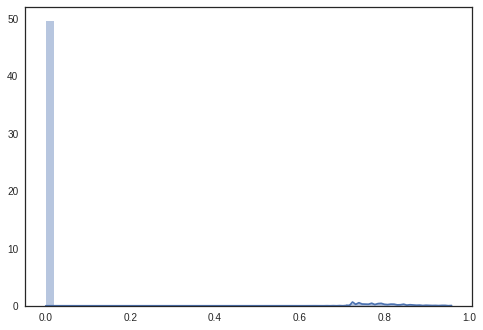

In [21]:
sns.distplot(control_data_array.ravel())

Save the thresholded matrix.

In [22]:
control_data_95pctl = pd.DataFrame(control_data_array)

In [26]:
control_data_95pctl.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_control_95pctl_mat_20180316.csv', index=None, header=None)

#### Visualize community structure and nodal roles.

For the unthresholded matrix.

In [32]:
control_data_raw_reordered = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/control_raw_ReorderedMatrix.txt').reshape((139,139))

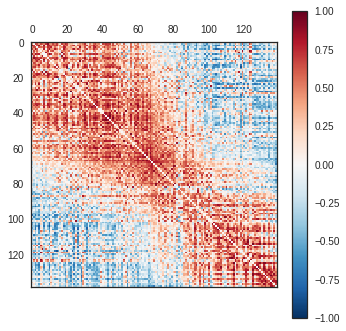

In [33]:
plot_raw_matrix(control_data_raw_reordered)

In [40]:
control_raw_pc = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/control_raw_PC.txt')

In [41]:
control_raw_wdz = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/control_raw_WMDz.txt')

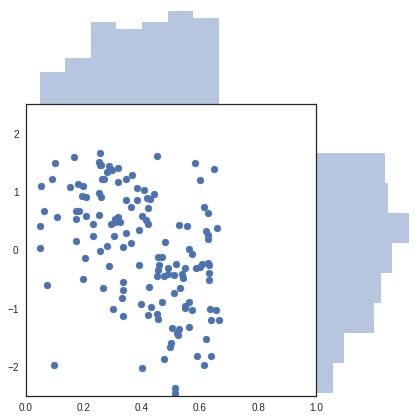

In [67]:
grid = sns.jointplot(control_raw_pc, control_raw_wdz, kind='scatter',space=0, stat_func=None, xlim=(0,1), ylim=(-2.5, 2.5), ratio=3)

For the thresholded matrix.

In [35]:
control_data_95pctl_reordered = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/control_95pctl_ReorderedMatrix.txt').reshape((139,139))

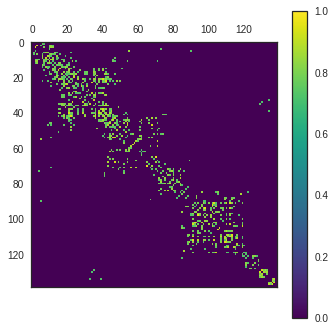

In [36]:
plot_thresh_matrix(control_data_95pctl_reordered)

In [37]:
control_95pctl_pc = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/control_95pctl_PC.txt')

In [38]:
control_95pctl_wdz = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/control_95pctl_WMDz.txt')

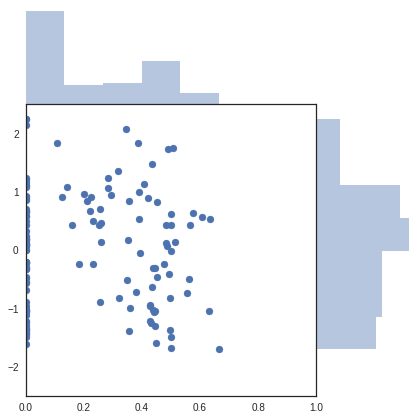

In [39]:
grid = sns.jointplot(control_95pctl_pc, control_95pctl_wdz, kind='scatter',space=0, stat_func=None, xlim=(0,1), ylim=(-2.5, 2.5), ratio=3)

## Withdrawal Group

Load the correlation of cFos co-activations across animals in alcohol withdrawal.

In [57]:
withdrawal_df = pd.read_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_withdrawal_orig_20180316.csv')

Drop the column of brain area labels.


In [58]:
withdrawal_data = withdrawal_df.iloc[0:, 1:]

Save a new version of the raw correlation values without row or column labels.

In [59]:
withdrawal_data.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_withdrawal_raw_mat_20180317.csv', index=None, header=None)

Get the correlatoin values as an array.


In [46]:
withdrawal_data_array = withdrawal_data.values

Zero-out self correlations.

In [47]:
np.fill_diagonal(withdrawal_data_array, 0)

Plot the raw correlation matrix.

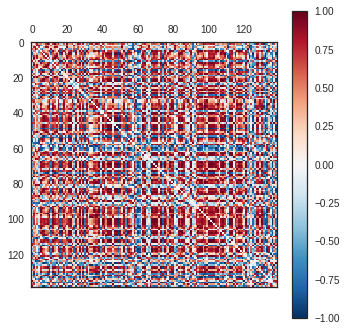

In [48]:
plot_raw_matrix(withdrawal_data_array)

Plot the distribution of correlation coefficients.

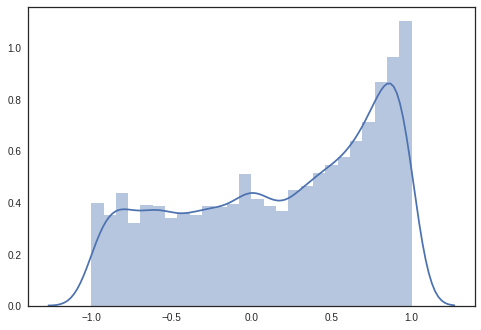

In [49]:
sns.distplot(withdrawal_data_array.ravel())

Threshold the correlation matrix with a connection density of 5%.

In [50]:
wd_95pctl = stats.scoreatpercentile(withdrawal_data_array, 95)

In [51]:
withdrawal_95pctl_mask = (withdrawal_data_array <= wd_95pctl)

In [52]:
withdrawal_data_array[withdrawal_95pctl_mask] = 0

Save the thresholded matrix.

In [53]:
withdrawal_data_95pctl = pd.DataFrame(withdrawal_data_array)

In [54]:
withdrawal_data_95pctl.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/data/cFosCAN_alcohol_withdrawal_95pctl_mat_20180316.csv', index=None, header=None)

#### Visualize community structure and nodal roles.

For the unthresholded matrix.

In [60]:
withdrawal_data_raw_reordered = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/withdrawal_raw_ReorderedMatrix.txt').reshape((139,139))

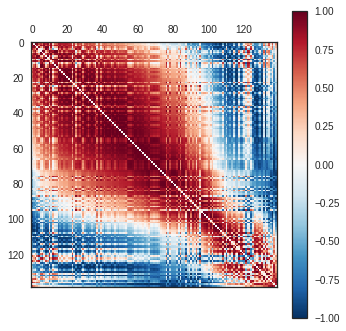

In [61]:
plot_raw_matrix(withdrawal_data_raw_reordered)

In [64]:
withdrawal_raw_pc = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/withdrawal_raw_PC.txt')

In [65]:
withdrawal_raw_wdz = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/withdrawal_raw_WMDz.txt')

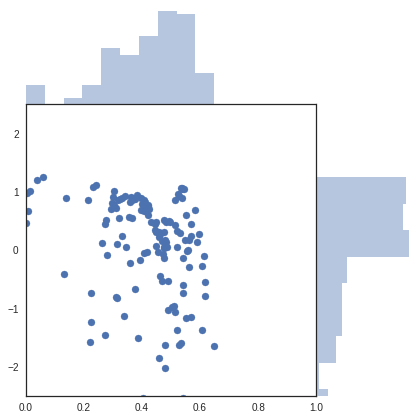

In [66]:
grid = sns.jointplot(withdrawal_raw_pc, withdrawal_raw_wdz, kind='scatter',space=0, stat_func=None, xlim=(0,1), ylim=(-2.5, 2.5), ratio=3)

For the thresholded matrix.

In [68]:
withdrawal_data_95pctl_reordered = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/withdrawal_95pctl_ReorderedMatrix.txt').reshape((139,139))

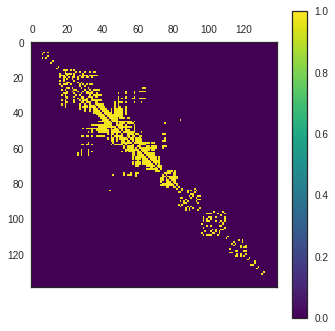

In [69]:
plot_thresh_matrix(withdrawal_data_95pctl_reordered)

In [70]:
withdrawal_95pctl_pc = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/withdrawal_95pctl_PC.txt')

In [71]:
withdrawal_95pctl_wdz = np.loadtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/data/louvain_gamma1.0/withdrawal_95pctl_WMDz.txt')

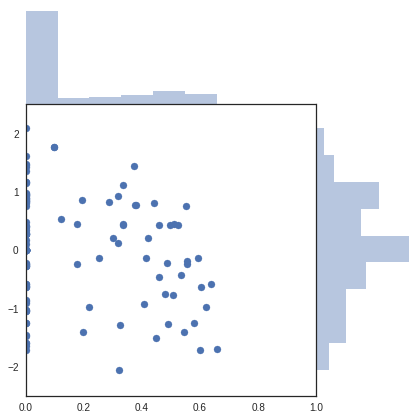

In [72]:
grid = sns.jointplot(withdrawal_95pctl_pc, withdrawal_95pctl_wdz, kind='scatter',space=0, stat_func=None, xlim=(0,1), ylim=(-2.5, 2.5), ratio=3)

## Coompare nodal roles between control and experimental groups

### Participation Coefficient

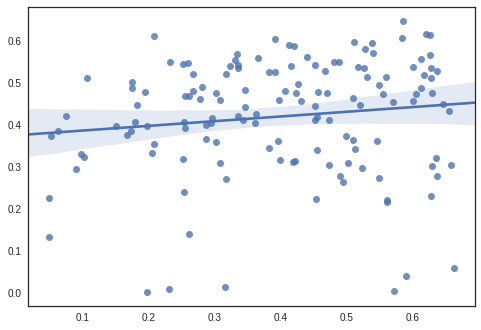

In [76]:
sns.regplot(control_raw_pc, withdrawal_raw_pc)

In [78]:
pc_diffs = withdrawal_raw_pc - control_raw_pc

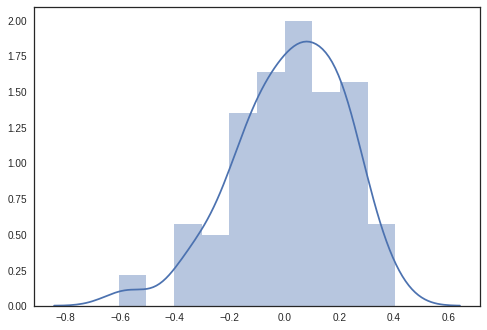

In [90]:
sns.distplot(pc_diffs)

In [87]:
pc_diffs_labeled = pd.Series(pc_diffs, control_df.iloc[:,0].values)

In [89]:
pc_diffs_labeled.sort_values()

Basolateral amygdalar nucleus                   -0.604775
Parasubthalamic nucleus                         -0.568123
Endopiriform nucleus                            -0.550633
Intercalated amygdalar nucleus                  -0.398576
Lateral amygdalar nucleus                       -0.360132
Central amygdalar nucleus                       -0.355151
Cortical amygdalar area posterior part          -0.346210
Subparaventricular zone                         -0.341550
vestibulocochlear nerve                         -0.327872
Orbital area medial part                        -0.314062
Midbrain                                        -0.303114
Primary somatosensory area mouth                -0.275523
Agranular insular area posterior part           -0.231605
Subiculum                                       -0.230588
Superior colliculus sensory related             -0.226866
cerebrum related                                -0.223550
Precommissural nucleus                          -0.223061
optic tract   

### Within-module Degree (z-score)

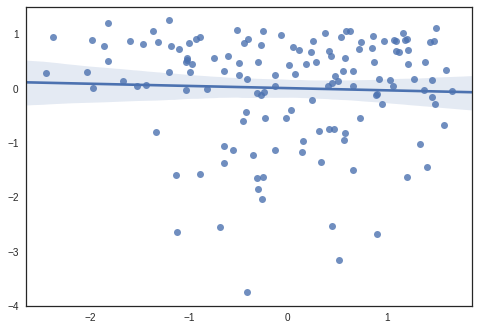

In [77]:
sns.regplot(control_raw_wdz, withdrawal_raw_wdz)

In [92]:
wdz_diffs = withdrawal_raw_wdz- control_raw_wdz

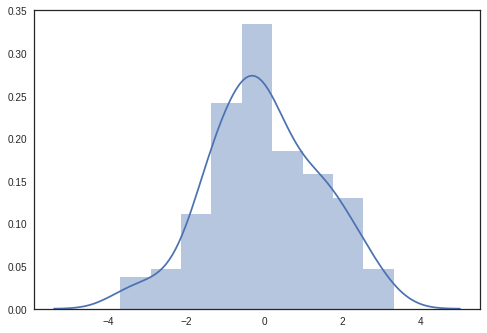

In [93]:
sns.distplot(wdz_diffs)

In [94]:
wdz_diffs_labeled = pd.Series(wdz_diffs, control_df.iloc[:,0].values)

In [95]:
wdz_diffs_labeled.sort_values()

Median preoptic nucleus                               -3.681014
Nucleus accumbens                                     -3.584843
Posterior amygdalar nucleus                           -3.330360
Primary auditory area                                 -2.975254
Pallidum                                              -2.854477
Retrosplenial area ventral part                       -2.835294
Claustrum                                             -2.362625
Perirhinal area                                       -2.256847
Anterior cingulate area ventral part                  -2.166599
Postsubiculum                                         -1.859239
Substantia innominata                                 -1.777188
Periventricular hypothalamic nucleus posterior part   -1.765165
Medial preoptic nucleus                               -1.720395
Fundus of striatum                                    -1.706189
medial forebrain bundle system                        -1.623155
Medial geniculate complex               